In [56]:
import pandas as pd

In [57]:
df=pd.read_csv('customer 1-EDa-prj1.csv')

In [58]:
df.head()

,customer_id,age,income,purchase_amount,gender,region,total_purchases,preferred_product_category,customer_loyalty_score,signup_date,last_purchase_date
0,1,56.0,67700.0,1019.145669,Female,South,31.0,Toys,12.501082,2022-05-01,2022-02-27
1,2,69.0,50200.0,252.214693,Male,North,27.0,Toys,14.402036,2022-03-14,2022-07-03
2,3,46.0,84000.0,354.742321,Male,East,25.0,Clothing,89.085761,2022-07-17,2022-04-13
3,4,32.0,42700.0,716.573913,Male,West,5.0,Electronics,98.800804,2022-07-09,2021-04-21
4,5,60.0,112300.0,1528.118235,Female,West,6.0,Clothing,28.893785,2021-04-21,2021-06-02


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3526 entries, 0 to 3525
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 3526 non-null   int64  
 1   age                         3520 non-null   float64
 2   income                      3520 non-null   float64
 3   purchase_amount             3520 non-null   float64
 4   gender                      3519 non-null   object 
 5   region                      3520 non-null   object 
 6   total_purchases             3520 non-null   float64
 7   preferred_product_category  3518 non-null   object 
 8   customer_loyalty_score      3521 non-null   float64
 9   signup_date                 3520 non-null   object 
 10  last_purchase_date          3520 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 303.1+ KB


In [60]:

df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'],format='%Y-%m-%d')
df['signup_date'] = pd.to_datetime(df['signup_date'],format='%Y-%m-%d')

In [61]:
df.shape

(3526, 11)

In [62]:
df.isnull().sum()

customer_id                   0
age                           6
income                        6
purchase_amount               6
gender                        7
region                        6
total_purchases               6
preferred_product_category    8
customer_loyalty_score        5
signup_date                   6
last_purchase_date            6
dtype: int64

In [63]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [64]:
df.drop(df[(df['age']<=0) | (df['age']>80)].index,inplace=True)
df.round({'income':-3})
df.drop(df[(df['income']<20000) | (df['income']>120000)].index,inplace=True)
df.drop(df[(df['purchase_amount']<20) | (df['purchase_amount']>2000)].index,inplace=True)
df.drop(df[~df['gender'].isin({'Male','Female'})].index,inplace=True)
df.drop(df[~df['region'].isin({'North','South','East','West'})].index,inplace=True)
df.drop(df[~df['preferred_product_category'].isin({'Clothing','Electronics','Home & Garden','Toys','Health'})].index,inplace=True)
df.drop(df[(df['customer_loyalty_score']<0) | (df['customer_loyalty_score']>100)].index,inplace=True)
df.drop(df[(df['signup_date']<pd.Timestamp('2021-01-01')) | (df['signup_date']>pd.Timestamp('2022-12-31'))].index,inplace=True)
df.drop(df[(df['total_purchases']<1) | (df['total_purchases']>50)].index,inplace=True)
df.drop(df[df['last_purchase_date']<=df['signup_date']].index,inplace=True)

In [65]:
df.sample(10)

,customer_id,age,income,purchase_amount,gender,region,total_purchases,preferred_product_category,customer_loyalty_score,signup_date,last_purchase_date
2781,2782,62.0,31200.0,128.334066,Male,East,23.0,Electronics,40.343062,2021-07-01,2022-01-08
3047,3048,22.0,40400.0,825.508842,Female,North,2.0,Clothing,38.774153,2022-09-29,2023-02-07
2944,2945,53.0,110100.0,282.288529,Female,South,6.0,Electronics,98.626975,2022-07-10,2023-03-23
84,85,53.0,113000.0,1706.156752,Female,North,41.0,Clothing,82.131234,2022-02-28,2023-05-09
488,489,42.0,99100.0,645.833814,Female,North,20.0,Clothing,39.558211,2021-10-22,2023-06-03
235,236,56.0,57900.0,1466.375105,Female,East,31.0,Home & Garden,32.198309,2022-04-09,2022-09-30
398,399,65.0,64700.0,677.333213,Male,South,28.0,Toys,48.458808,2022-10-09,2023-03-31
3057,3058,39.0,113700.0,1516.888399,Female,West,1.0,Electronics,26.833107,2022-03-01,2022-05-19
2471,2472,29.0,20300.0,587.798418,Female,South,17.0,Clothing,73.067737,2022-09-14,2023-07-17
2636,2637,20.0,118000.0,1299.802922,Female,East,31.0,Home & Garden,14.863756,2021-05-09,2022-06-30


In [66]:
df.drop_duplicates(subset='customer_id', inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2220 entries, 1 to 3474
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customer_id                 2220 non-null   int64         
 1   age                         2220 non-null   float64       
 2   income                      2220 non-null   float64       
 3   purchase_amount             2220 non-null   float64       
 4   gender                      2220 non-null   object        
 5   region                      2220 non-null   object        
 6   total_purchases             2220 non-null   float64       
 7   preferred_product_category  2220 non-null   object        
 8   customer_loyalty_score      2220 non-null   float64       
 9   signup_date                 2220 non-null   datetime64[ns]
 10  last_purchase_date          2220 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(1), object(3)
memory 

In [68]:
df.head()

,customer_id,age,income,purchase_amount,gender,region,total_purchases,preferred_product_category,customer_loyalty_score,signup_date,last_purchase_date
1,2,69.0,50200.0,252.214693,Male,North,27.0,Toys,14.402036,2022-03-14,2022-07-03
4,5,60.0,112300.0,1528.118235,Female,West,6.0,Clothing,28.893785,2021-04-21,2021-06-02
5,6,25.0,62000.0,1024.023200,Male,West,5.0,Home & Garden,14.360273,2021-11-18,2023-07-06
6,7,78.0,90500.0,1283.045712,Female,East,27.0,Home & Garden,48.221228,2022-06-11,2023-02-01
7,8,38.0,81000.0,1970.645619,Male,East,8.0,Clothing,70.952806,2021-06-26,2022-12-21


In [69]:
df.total_purchases.value_counts()

total_purchases
15.0    76
10.0    55
18.0    55
31.0    54
19.0    54
44.0    54
3.0     53
5.0     53
39.0    53
1.0     53
9.0     52
23.0    52
49.0    52
48.0    51
4.0     50
28.0    50
33.0    48
21.0    47
17.0    47
8.0     47
27.0    47
34.0    46
32.0    46
46.0    46
36.0    44
2.0     44
22.0    43
30.0    43
42.0    42
14.0    42
24.0    41
6.0     41
26.0    41
29.0    41
20.0    41
43.0    40
45.0    40
13.0    40
41.0    39
37.0    39
38.0    39
35.0    39
40.0    38
7.0     38
12.0    38
47.0    35
16.0    34
25.0    33
11.0    24
Name: count, dtype: int64

In [70]:
df.shape

(2220, 11)

In [71]:
df['difference_between_last_purhcase_signup'] = (df['last_purchase_date'] - df['signup_date']).dt.days

In [72]:
df['Days since last purchase'] = (df['last_purchase_date'] - pd.to_datetime('today')).dt.days

In [73]:
df['purchase_group_by_monthsname'] = df['last_purchase_date'].dt.to_period('M')

In [74]:
df.head()

,customer_id,age,income,purchase_amount,gender,region,total_purchases,preferred_product_category,customer_loyalty_score,signup_date,last_purchase_date,difference_between_last_purhcase_signup,Days since last purchase,purchase_group_by_monthsname
1,2,69.0,50200.0,252.214693,Male,North,27.0,Toys,14.402036,2022-03-14,2022-07-03,111,-1216,2022-07
4,5,60.0,112300.0,1528.118235,Female,West,6.0,Clothing,28.893785,2021-04-21,2021-06-02,42,-1612,2021-06
5,6,25.0,62000.0,1024.023200,Male,West,5.0,Home & Garden,14.360273,2021-11-18,2023-07-06,595,-848,2023-07
6,7,78.0,90500.0,1283.045712,Female,East,27.0,Home & Garden,48.221228,2022-06-11,2023-02-01,235,-1003,2023-02
7,8,38.0,81000.0,1970.645619,Male,East,8.0,Clothing,70.952806,2021-06-26,2022-12-21,543,-1045,2022-12


In [75]:
df.to_csv('customer_cleaned.csv', index=False)

# EDA

# Descriptive (Analysis)

In [76]:
df.describe()

,customer_id,age,income,purchase_amount,total_purchases,customer_loyalty_score,signup_date,last_purchase_date,difference_between_last_purhcase_signup,Days since last purchase
count,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220,2220,2220.000000,2220.000000
mean,1745.137838,48.309910,70296.576577,1001.993272,24.658108,49.838757,2021-11-03 19:19:47.027027200,2022-12-02 02:38:16.216216064,393.304505,-1063.890090
min,2.000000,18.000000,20200.000000,20.369326,1.000000,0.085729,2021-01-01 00:00:00,2021-01-22 00:00:00,1.000000,-1743.000000
25%,872.750000,33.000000,44575.000000,526.563855,13.000000,24.578672,2021-05-09 18:00:00,2022-06-06 00:00:00,187.750000,-1243.000000
50%,1742.500000,48.000000,70000.000000,1003.636322,24.000000,49.785463,2021-10-13 00:00:00,2022-12-30 00:00:00,364.000000,-1036.000000
75%,2631.250000,64.000000,96300.000000,1496.388319,37.000000,74.498006,2022-04-14 06:00:00,2023-07-05 00:00:00,577.000000,-849.000000
max,3475.000000,79.000000,120000.000000,1999.508096,49.000000,99.935293,2022-12-31 00:00:00,2023-12-31 00:00:00,1068.000000,-670.000000
std,1006.335888,17.767498,28989.099861,570.196144,14.236139,28.778469,NaN,NaN,253.604686,256.018352


# Univariate Analysis

<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

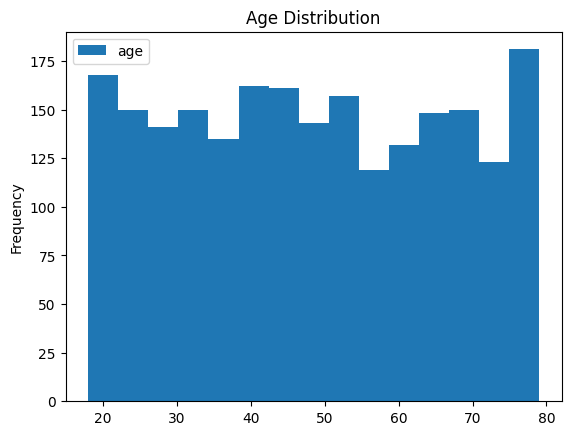

In [77]:
# Age Distribution
df.plot(kind='hist', y='age', bins=15, title='Age Distribution')

<Axes: title={'center': 'Income Distribution'}, ylabel='Frequency'>

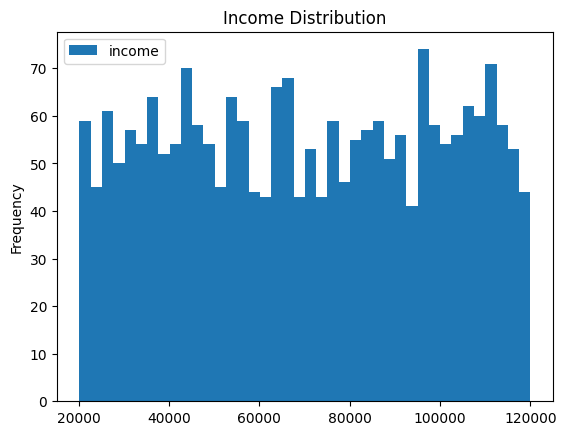

In [78]:
# income Distribution 
df.plot(kind='hist', y='income', bins=40, title='Income Distribution')

# bivariate Analysis

<Axes: title={'center': 'Income Distribution wrt Age'}, xlabel='age', ylabel='income'>

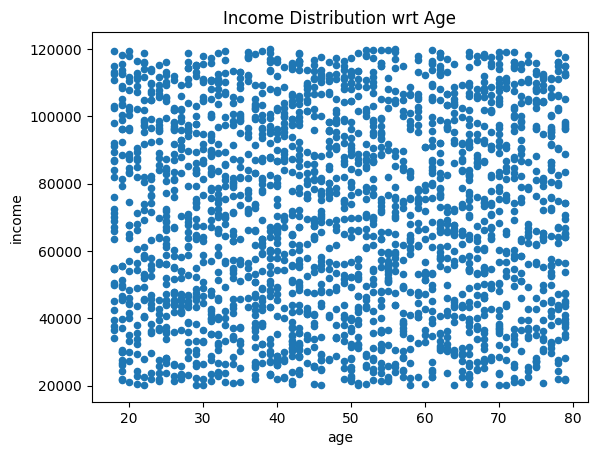

In [79]:
# Income Distribution wrt age
df.plot(kind='scatter', x='age', y='income', title='Income Distribution wrt Age')

<Axes: title={'center': 'Age vs Total Purchases'}, xlabel='age', ylabel='total_purchases'>

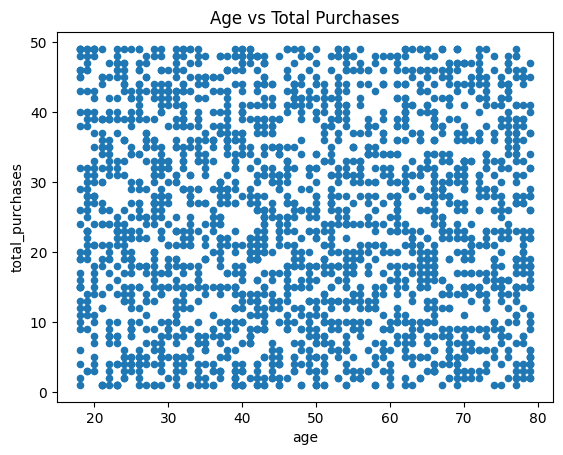

In [80]:
# age vs total_purchases
df.plot(kind='scatter', x='age', y='total_purchases', title='Age vs Total Purchases')

<Axes: title={'center': 'Age vs Purchase Amount'}, xlabel='age', ylabel='purchase_amount'>

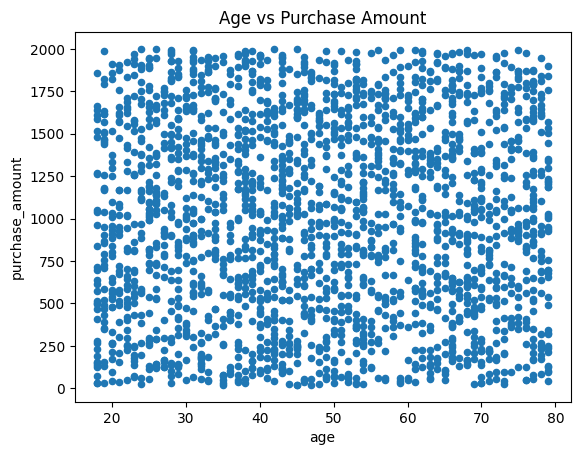

In [81]:
# age vs purchase amount
df.plot(kind='scatter', x='age', y='purchase_amount', title='Age vs Purchase Amount')

<Axes: title={'center': 'Income Distribution wrt Age'}, xlabel='income', ylabel='age'>

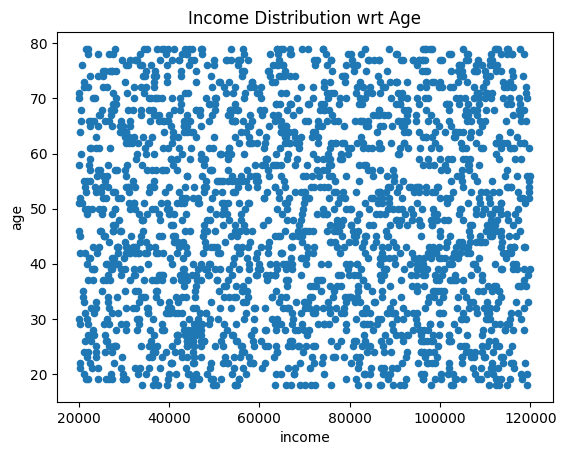

In [82]:
# Income Distribution wrt Age
df.plot(kind='scatter', x='income', y='age', title='Income Distribution wrt Age')

In [83]:
df.columns

Index(['customer_id', 'age', 'income', 'purchase_amount', 'gender', 'region',
       'total_purchases', 'preferred_product_category',
       'customer_loyalty_score', 'signup_date', 'last_purchase_date',
       'difference_between_last_purhcase_signup', 'Days since last purchase',
       'purchase_group_by_monthsname'],
      dtype='object')

<Axes: title={'center': 'Total Purchases over Time'}, xlabel='purchase_group_by_monthsname'>

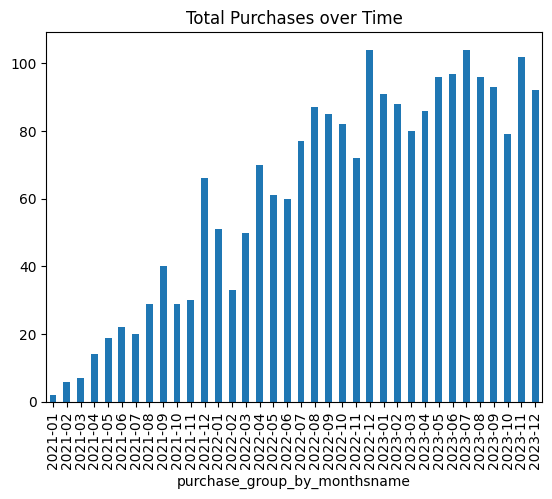

In [84]:
# total purchase w.r.t to time 
df.groupby('purchase_group_by_monthsname').size().plot(kind='bar', title='Total Purchases over Time')

<Axes: title={'center': 'Total Purchases Amount by Category over Time'}, xlabel='purchase_group_by_monthsname'>

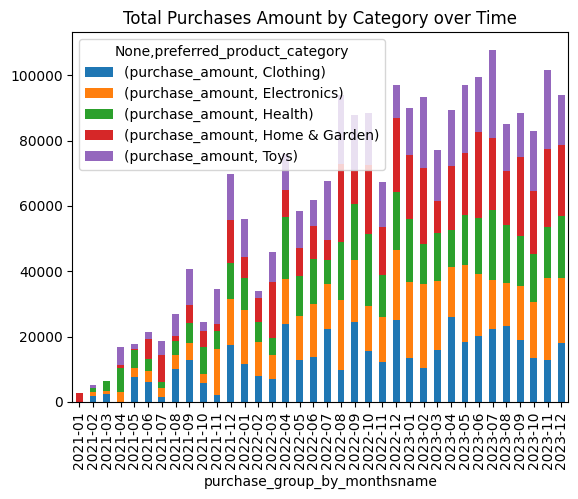

In [85]:
# purchases amount according to months according to category
df.groupby(['purchase_group_by_monthsname', 'preferred_product_category']).agg({'purchase_amount': 'sum'}).unstack().plot(kind='bar', stacked=True, title='Total Purchases Amount by Category over Time')

<Axes: title={'center': 'Total Purchases Amount by Region over Time'}, xlabel='purchase_group_by_monthsname'>

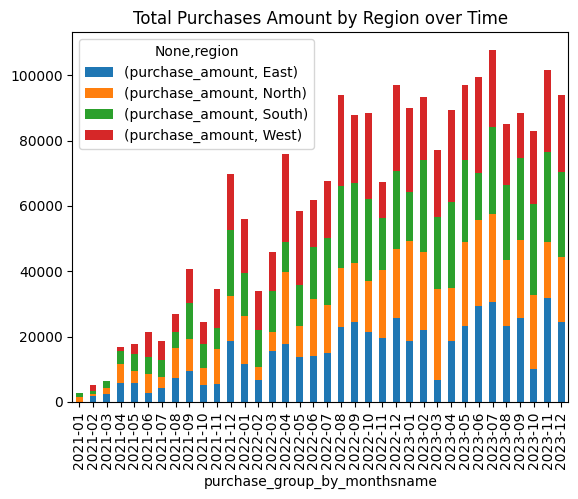

In [86]:
# PURHCSE grooth wrt time and region
df.groupby(['purchase_group_by_monthsname', 'region']).agg({'purchase_amount': 'sum'}).unstack().plot(kind='bar', stacked=True, title='Total Purchases Amount by Region over Time')

<Axes: title={'center': 'Total Purchase Amount by Region'}, xlabel='region'>

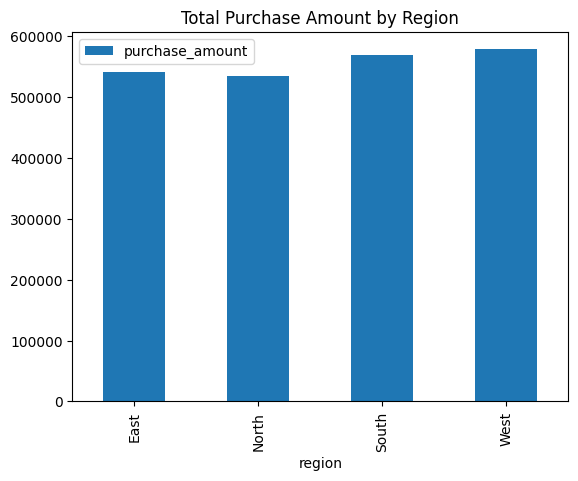

In [88]:
# Graph to identify the target region to focus on 
df.groupby('region').agg({'purchase_amount': 'sum'}).plot(kind='bar', title='Total Purchase Amount by Region')

<Axes: title={'center': 'Total Purchase Amount by Product Category'}, xlabel='preferred_product_category'>

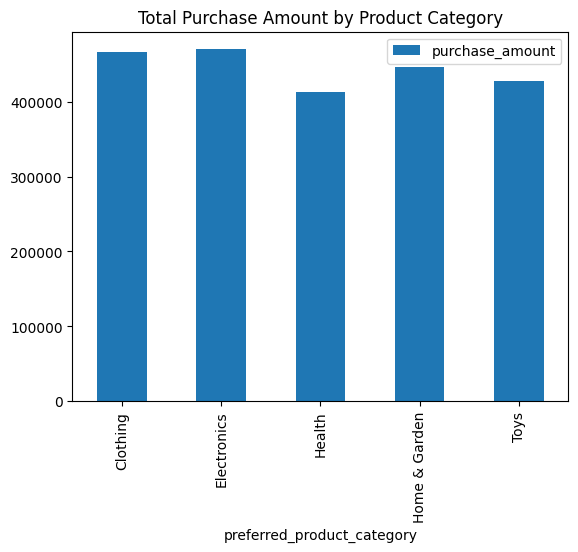

In [89]:
# graph to identify target product category
df.groupby('preferred_product_category').agg({'purchase_amount': 'sum'}).plot(kind='bar', title='Total Purchase Amount by Product Category')

<Axes: title={'center': 'Average Customer Loyalty Score by Region'}, xlabel='region'>

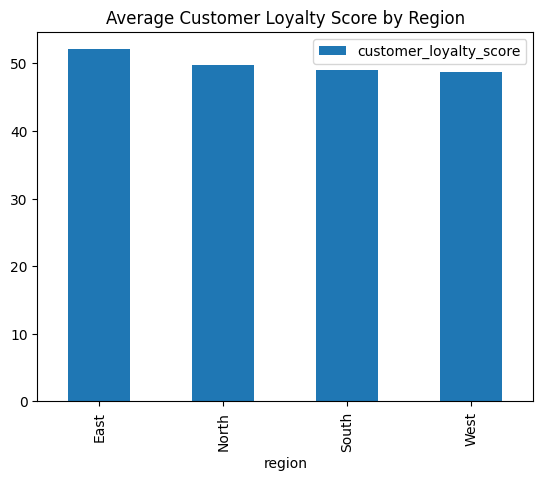

In [90]:
# Graph  to identify loyal customers based on lotyality score and region
df.groupby('region').agg({'customer_loyalty_score': 'mean'}).plot(kind='bar', title='Average Customer Loyalty Score by Region')


<Axes: title={'center': 'Average Days Since Last Purchase by Gender'}, xlabel='gender'>

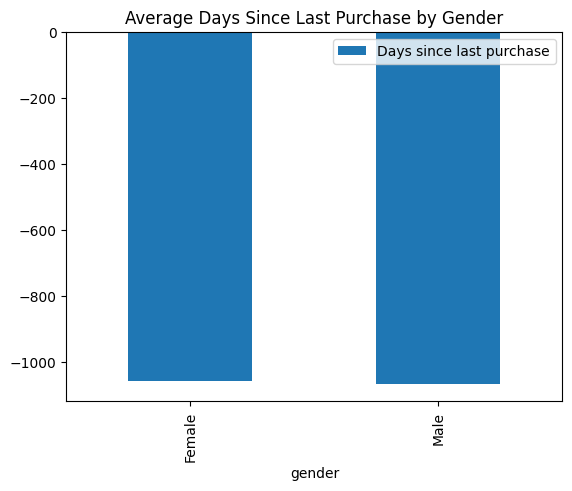

In [91]:
# Graph to identify where we are losing the customers according to male and female
df.groupby('gender').agg({'Days since last purchase': 'mean'}).plot(kind='bar', title='Average Days Since Last Purchase by Gender')

# Customers Clustering 


In [92]:
df.columns

Index(['customer_id', 'age', 'income', 'purchase_amount', 'gender', 'region',
       'total_purchases', 'preferred_product_category',
       'customer_loyalty_score', 'signup_date', 'last_purchase_date',
       'difference_between_last_purhcase_signup', 'Days since last purchase',
       'purchase_group_by_monthsname'],
      dtype='object')

In [93]:
#encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'region', 'preferred_product_category'], drop_first=True)   
df_encoded.head()
df_encoded.columns

Index(['customer_id', 'age', 'income', 'purchase_amount', 'total_purchases',
       'customer_loyalty_score', 'signup_date', 'last_purchase_date',
       'difference_between_last_purhcase_signup', 'Days since last purchase',
       'purchase_group_by_monthsname', 'gender_Male', 'region_North',
       'region_South', 'region_West', 'preferred_product_category_Electronics',
       'preferred_product_category_Health',
       'preferred_product_category_Home & Garden',
       'preferred_product_category_Toys'],
      dtype='object')

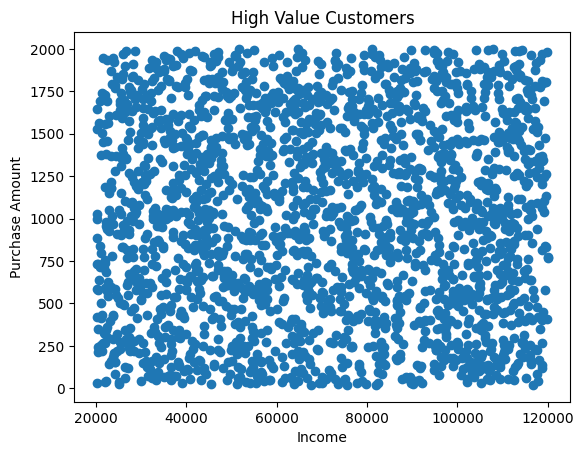

In [94]:
# Identifying the high value customers based on purchase amount and income.
import matplotlib.pyplot as plt
plt.scatter(df['income'], df['purchase_amount'])
plt.title('High Value Customers')
plt.xlabel('Income')
plt.ylabel('Purchase Amount')
plt.show()

<Axes: title={'center': 'Average Customer Loyalty Score by Product Category'}, xlabel='preferred_product_category'>

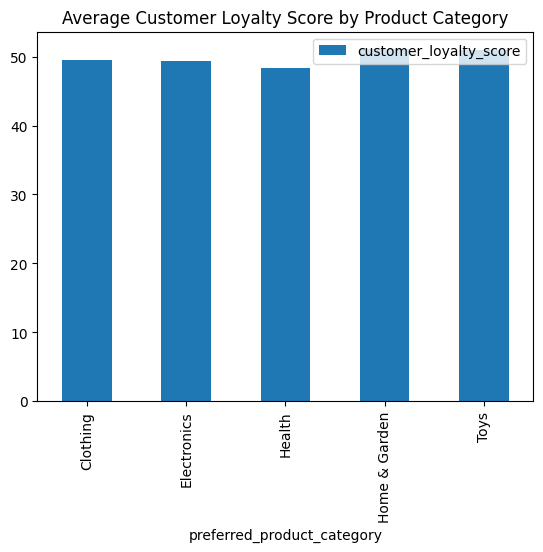

In [96]:
# Graph to identify loyal customers based on loyalty score and product category
df.groupby('preferred_product_category').agg({'customer_loyalty_score': 'mean'}).plot(kind='bar', title='Average Customer Loyalty Score by Product Category')


# Clustering 

In [102]:
data=pd.read_csv('customer 1-EDa-prj1.csv')

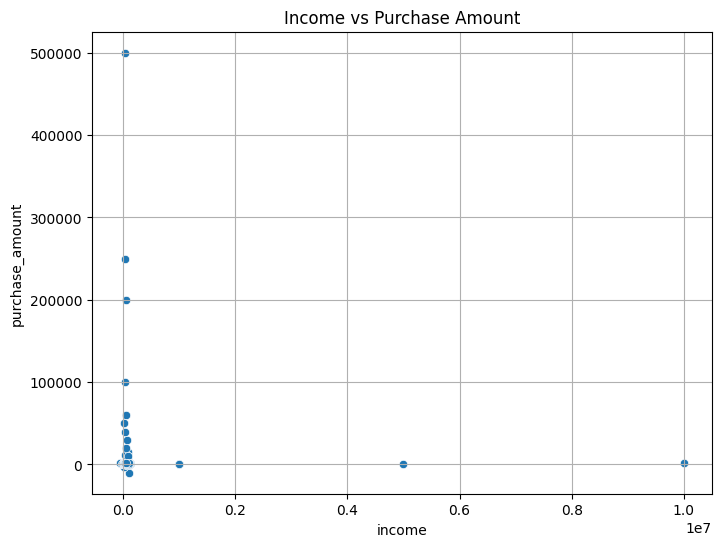

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
 
# Step 1: Load data
 
# Step 2: EDA
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='income', y='purchase_amount')
plt.title("Income vs Purchase Amount")
plt.grid(True)
plt.show()
 
# Step 3: Elbow Method
X = data[['income', 'purchase_amount']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
 
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()
 
# Step 4: K-Means Clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(X)
 
# Step 5: Visualize
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='income', y='purchase_amount',
                hue='Cluster', palette='tab10', s=100)
plt.title("Customer Segments")
plt.legend(title='Cluster')
plt.show()
 
# Step 6: Analyze clusters
cluster_summary = data.groupby('Cluster')[['income', 'purchase_amount']].mean()
print(cluster_summary)
 
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cluster Summary")
plt.show()
 
 